In [1]:
import tellurium as te
import cobra

There are two types of pathway models: 
1. kinetic models
2. constraint-based models. 

Both pathway models have a list of reactions that contribute to the pathway. 
The main difference between kinetic models and constraint-based models is that constraint-based models do not have defined reaction rates for each of their chemical reactions. 

## Kinetic Models

Kinetic models have defined kinetics, meaning that their rate laws are defined. You can see that below in this yeast glycolytic oscillations model [1]. 

Kinetic models are standardly written in the Systems Biology Markup Language (SBML) and the file extension will generally be `.xml`. 
`.xml` files are not human readable. However, you can produce a human readable version by converting the content of an `xml` file into an Antimony [2] string using the Python package Tellurium. 


1. Wolf, J., & Heinrich, R. (2000). Effect of cellular interaction on glycolytic oscillations in yeast: a theoretical investigation. Biochemical Journal, 345(2), 321-334.
2. Smith, L. P., Bergmann, F. T., Chandran, D., & Sauro, H. M. (2009). Antimony: a modular model definition language. Bioinformatics, 25(18), 2452-2454.
3. Choi, K., Medley, J. K., Cannistra, C., König, M., Smith, L., Stocking, K., & Sauro, H. M. (2016). Tellurium: A python based modeling and reproducibility platform for systems biology. BioRxiv, 054601.

In [2]:
# loading an sbml file via URL from the biomodels website
r = te.loads('https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1006230022/3/BIOMD0000000691_url.xml')
# When sbml or antimony files are loaded into tellurium, they become 
# roadrunner objects, hence the variable 'r'

# asking the roadrunner object for the antimony string
# parsing the string to show the reactions
print(r.getCurrentAntimony().split('// ')[4])

Reactions:
  v1_cell_1: S1__Cell_1_ + 2 A3__Cell_1_ => 2 S2__Cell_1_; Cell_1*function_for_v1(k1, S1__Cell_1_, A3__Cell_1_, K_I, q);
  v1_cell_2: S1__Cell_2_ + 2 A3__Cell_2_ => 2 S2__Cell_2_; Cell_2*function_for_v1(k1, S1__Cell_2_, A3__Cell_2_, K_I, q);
  v2_cell_1: S2__Cell_1_ + $N1__Cell_1_ => S3__Cell_1_ + N2__Cell_1_; Cell_1*function_for_v2(k2, S2__Cell_1_, N1__Cell_1_);
  v2_cell_2: S2__Cell_2_ + $N1__Cell_2_ => S3__Cell_2_ + N2__Cell_2_; Cell_2*function_for_v2(k2, S2__Cell_2_, N1__Cell_2_);
  v3_cell_1: S3__Cell_1_ + $A2__Cell_1_ => S4__Cell_1_ + 2 A3__Cell_1_; Cell_1*function_for_v3(k3, S3__Cell_1_, A2__Cell_1_);
  v3_cell_2: S3__Cell_2_ + $A2__Cell_2_ => S4__Cell_2_ + 2 A3__Cell_2_; Cell_2*function_for_v3(k3, S3__Cell_2_, A2__Cell_2_);
  v4_cell_1: S4__Cell_1_ + N2__Cell_1_ => ; Cell_1*k4*S4__Cell_1_*N2__Cell_1_;
  v4_cell_2: S4__Cell_2_ + N2__Cell_2_ => ; Cell_2*k4*S4__Cell_2_*N2__Cell_2_;
  v5_cell_1: A3__Cell_1_ => ; Cell_1*k5*A3__Cell_1_;
  v5_cell_2: A3__Cell_2_ => ; Cell_2

Each line above is formatted as such: 

`name of reaction` : `chemical reaction` ; `rate of reaction`; 

For more information on how to use tellurium, check out the `telluriumIntro.ipynb`


Because kinetic models include rate laws, you can use tellurium to 
calculate the metabolite concentrations over time. 

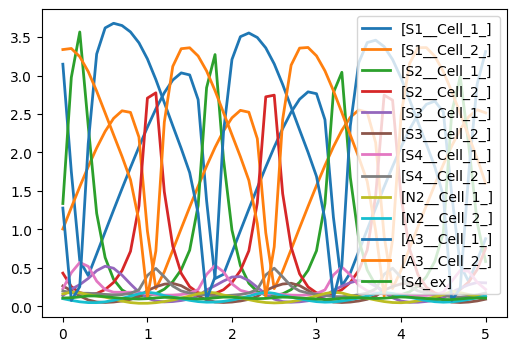

In [3]:
r.reset()
r.simulate(0,5)

r.S1__Cell_2_
r.simulate()
r.plot()

In [4]:
r.reset()
r.simulate(0, 10, 100)[99]

[10.          0.87939417  2.51462123  0.58308363  0.75226623  0.30599253
  0.09394676  0.22179205  0.17477249  0.11327109  0.1370399   3.31058742
  1.60049067  0.10790112]

In [5]:
# the actual values at each time point
r.simulate(50,100) 

    time, [S1__Cell_1_], [S1__Cell_2_], [S2__Cell_1_], [S2__Cell_2_], [S3__Cell_1_], [S3__Cell_2_], [S4__Cell_1_], [S4__Cell_2_], [N2__Cell_1_], [N2__Cell_2_], [A3__Cell_1_], [A3__Cell_2_],   [S4_ex]
 [[   50,      0.879394,       2.51462,      0.583084,      0.752266,      0.305993,     0.0939468,      0.221792,      0.174772,      0.113271,       0.13704,       3.31059,       1.60049,  0.107901],
  [   51,       1.52201,       2.09959,       2.43886,      0.170723,      0.173383,     0.0556853,      0.289135,      0.123358,      0.198999,     0.0600091,     0.0696429,       2.77248, 0.0868735],
  [   52,       2.35363,       1.07403,      0.243894,      0.380429,     0.0522722,      0.259729,      0.141466,        0.1963,     0.0685927,     0.0944125,       2.42295,       3.36774,  0.110451],
  [   53,       1.38888,      0.696532,      0.218863,       2.84514,      0.177171,      0.220866,      0.169239,      0.446401,     0.0723411,       0.17916,       3.32206,      0.177548,  0.1

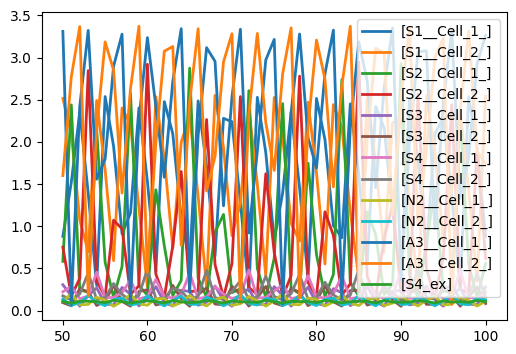

In [6]:
# you can plot with tellurium's built-in plot method or use a visualization
# package of your choice

r.plot()

## Constraint-based models

Generally speaking, genome-scale models (GSM) will be constraint-based models. This is because it is difficult to characterize the reaction rate for each reaction at a genome scale (hundreds to thousands of reactions). Therefore, much of the analyses performed on GSMs are constraint-based.

You can perform constraint-based analyses like flux balance analysis (FBA) using the Python package `cobra`. `cobra` accepts models in the SBML, `.json`, MATLAB, and `.yaml`.


### *What is flux balance analysis (FBA)?*



Mathematical method to calculate the flow of metabolites through a metabolic network, ie **rates**. 
- growth rate of an organism
- production rate of a metabolite 
- yield of product (production rate of product/consumption rate of substrate)

typically, FBA does not 
- use kinetic parameters, so *it cannot predict metabolite concentrations* or estimate changes over time

FBA requires a steady state assumption. Because you are solving a linear programming problem, you need to impose constraints and choose an objective. 

Some constraints would be 
- minimum growth rate, 
- reversibility of reactions

Some objectives would be 
- maximizing biomass
- maximizing a transport reaction (maximum theoretical yield of a specific metabolite)

*What is Flux Variability Analysis?*
Even with constraints, there is not necessarily one FBA solution, so FVA identifies the min and max flux values for each reaction. 


[Reference slides on FBA](https://cnls.lanl.gov/external/qbio2018/Slides/FBA%202/qBio-FBA-lecture.pdf)

In [7]:
# reading in an model file into cobra will create a cobra model object
model = cobra.io.read_sbml_model('../models/iJN1463_4aca.xml')
model.summary()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-23


Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.001234,0,0.00%
cl_e,EX_cl_e,0.001234,0,0.00%
cobalt2_e,EX_cobalt2_e,0.0008874,0,0.00%
cu2_e,EX_cu2_e,0.0008223,0,0.00%
fe2_e,EX_fe2_e,0.004287,0,0.00%
glc__D_e,EX_glc__D_e,6,6,100.00%
k_e,EX_k_e,0.04627,0,0.00%
mg2_e,EX_mg2_e,0.002056,0,0.00%
mn2_e,EX_mn2_e,0.0008223,0,0.00%
mobd_e,EX_mobd_e,0.0009525,0,0.00%


In [8]:
# to run a flux balance analysis, first set the model objective to the
# reaction you want to optimize
model.objective = model.reactions.BIOMASS_KT2440_WT3

# Run FBA
sol = model.optimize()
sol.fluxes.sort_values()

H2Otpp      -33.870069
H2Otex      -27.855889
CO2tex      -12.670212
CO2tpp      -12.670212
EX_o2_e     -11.707779
               ...    
NADH16pp     14.124843
CYTCAA3pp    23.387019
CYO1_KT      23.387019
EX_h2o_e     27.855889
ATPS4rpp     32.437059
Name: fluxes, Length: 2911, dtype: float64

You can see above that when the cell focuses on growing (with its 
current constraints on select reactions), it consumes metabolites 
through the reactions at the top of the list (`H2Otpp`, `H2Otex`, 
etc.) and produces metabolites through the reactions at the bottom of 
the list (`ATPS4rpp`, `EX_h2o_e`, etc.)

Reminder: fluxes are NOT concentrations! While a higher flux will tend
to suggest that more metabolites are made through a certain reaction, 
the flux value itself does not indicate any metabolite's concentration. 

Generally, a negative flux indicates that quantities are being consumed, 
while a positive flux indicates that quantities are being produced. 

To look up what these reactions are, you can use the following method: 

In [9]:
# summary of a reaction
model.reactions.get_by_id('ATPS4rpp')

Reaction identifier,ATPS4rpp
Name,ATP synthase (four protons for one ATP) (periplasm)
Memory address,0x1d6ad0a2e20
Stoichiometry,adp_c + 4.0 h_p + pi_c <=> atp_c + h2o_c + 3.0 h_c ADP C10H12N5O10P2 + 4.0 H+ + Phosphate <=> ATP C10H12N5O13P3 + H2O H2O + 3.0 H+
GPR,PP_5417 and PP_5418 and PP_5419 and PP_5412 and PP_5413 and PP_5414 and PP_5415 and PP_5416 and...
Lower bound,-1000.0
Upper bound,1000.0


You can also check out the reactions that a metabolite participates in. 

In [10]:
# here is Prephenate
model.metabolites.pphn_c

Metabolite identifier,pphn_c
Name,Prephenate
Memory address,0x1d6ab74daf0
Formula,C10H8O6
Compartment,c
In 6 reaction(s),"AROAT, CHORM, PPNDH, R_pheA, R_tyrA, PPND"


In [11]:
model.metabolites.pphn_c.summary()

Percent,Flux,Reaction,Definition
100.00%,0.1896,CHORM,chor_c --> pphn_c
Percent,Flux,Reaction,Definition
58.39%,-0.1107,R_pheA,h_c + pphn_c --> co2_c + h2o_c + phpyr_c
41.61%,-0.07888,R_tyrA,nad_c + pphn_c --> 34hpp_c + co2_c + nadh_c


You can see that prephenate is described as participating in six reactions, but there are only three reactions listed in the summary. This is because the other three have no flux with the current imposed constraints. 

To see more tricks with cobra, check out `iJN1463_modelTrimming.ipynb`
